Capstone Project --Metro Stations of Shanghai

Applied Data Science Capstone by IBM/Coursera

Table of contents
•Introduction: Business Problem
•Data
•Methodology
•Analysis
•Results and Discussion
•Conclusion

Introduction: Business Problem

  Shanghai is the economic center of China and has a population of over 14 million people. As a developed city, Shanghai is blessed with 19 metro lines and 413 stations. 
  As a newly born city, millions of people come in and out from Shanghai in one year. When people look for suitable house to rent or buy, places near a metro station are prone to be more attractive. The aim of this project is to look at the kinds of venues surrounding the metro stations and classify them based on the types of venues near a station the most, as well as taking into consideratio the geographic location of the station. The target customer of this project is the one who searches for a new home and wants to get well-knowed about one area.

Data

  The final dataframe used for data analysis contains the line 1 of Shanghai's metro stations' data. The list of all the metro stations we used were retrieved from the Wikipedia page:https://wanweibaike.com/wiki-%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81%E7%AB%99%E7%82%B9%E5%88%97%E8%A1%A8#1号线
  The dataframe which was retrieved through URL is concise and there is no need to molify the content. So the next step of this project is to coordinate the latitude and longitude to each row, by looping through the whole list and creating custom Google Geocoding API queries for each row from their cell values. We then save the dataframe into a .csv file, so that we can use it for repeated testing and data classification, without having to call the Google API each time.
  Using the coordinates we got from querying with the Google API, we can query locations and any nearby venues with the Foursquare Places API. We query each station's location and collect the number of venues, sorted by the top-level categories available from the Foursquare API. We can then classify each station based on the top categories of the total number of nearby venues around a station. Clusters of station locations and their surrounding areas can then be marked on a map of Shanghai and inform users about that part of the city.

Retrieve Shanghai metro stations' information from Wikipedia:

In [11]:
import pandas as pd
import csv
for i in range(1,2):
    url='https://wanweibaike.com/wiki-%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81%E7%AB%99%E7%82%B9%E5%88%97%E8%A1%A8#1号线'
    tb=pd.read_html(url)[0]
    tb.to_csv(r'SH.csv', mode='a', encoding='utf_8_sig', header=1, index=0)
    print('第'+str(i)+'页抓取完成')

第1页抓取完成


Take a look at the data using the code below :

In [12]:
import pandas as pd
import numpy as np
raw_df=pd.read_csv(r'SH.csv')
raw_df.head()

,Number,Station_Name,Opened,Location,Platform_Level,Platform_Type,Transfers
0,1,莘庄,1996年12月28日,Minhang,At-grade,Side platform,5
1,1,外环路,1996年12月28日,Minhang,At-grade,Side platform,NaN
2,1,莲花路,1996年12月28日,Minhang,At-grade,Side platform,NaN
3,1,锦江乐园,1996年12月28日,Xuhui,At-grade,Side platform,NaN
4,1,上海南站,2004年10月30日,Xuhui,Underground,Island platform,3


 We want to get the longitude and latitude from the Baidu API (http://api.map.baidu.com/place/v2/search?query=#geocoding) and we will use the json outputFormat with the address and components filtering parameters, with our API key being the last ingredient in the query.For the components part, we use the administrative_area:Shanghai to help narrow down the search to just the Shanghai administrative area in China. The output from the query will be a csv text. 

In [13]:
import pandas
from bs4 import BeautifulSoup 
from urllib import request
import re
import pandas as pd
import numpy as np
import urllib.parse as urp
from xml.etree import ElementTree
import time

def __get_location1__(name,city):  
        my_ak = '54sYa6LO9aMKWOdyzaQfRkIGc3eD31Qa'    
        tag = urp.quote('地铁站')
        qurey = urp.quote(name)
        try:
            url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+'&tag='+'&region='+urp.quote(city)+'&output=json&ak='+my_ak
            print(url)
            req = request.urlopen(url)
            res = req.read().decode()
            lat = pd.to_numeric(re.findall('"lat":(.*)',res)[0].split(',')[0])
            lng = pd.to_numeric(re.findall('"lng":(.*)',res)[0])
            return (lng,lat)
        except:
            return 0,0

Combine the latitude and longitude with the dataframe:

In [14]:
Station=pd.read_csv(r'Station.csv',encoding='gb18030')
Station.head()
Station.head()latitudes=[]
longitudes=[]
for i in Stations:
    __get_location1__(i,'上海')
    latitudes.append(lat)
    longitudes.append(lng)

,Station_Name
0,莘庄
1,外环路
2,莲花路
3,锦江乐园
4,上海南站


In [1]:
import pandas as pd
df=pd.read_csv(r'SH_1.csv')
df

,Number,Station_Name,Opened,Location,Platform_Level,Platform_Type,Transfers,Longitude,Latitude
0,1,莘庄,1996年12月28日,Minhang,At-grade,Side platform,5,121.392186,31.116872
1,1,外环路,1996年12月28日,Minhang,At-grade,Side platform,NaN,121.399614,31.126649
2,1,莲花路,1996年12月28日,Minhang,At-grade,Side platform,NaN,121.409334,31.136734
3,1,锦江乐园,1996年12月28日,Xuhui,At-grade,Side platform,NaN,121.415479,31.145542
4,1,上海南站,2004年10月30日,Xuhui,Underground,Island platform,3,121.435865,31.159439
5,1,漕宝路,1993年5月28日,Xuhui,Underground,Island platform,12,121.440466,31.174838
6,1,上海体育馆,1993年5月28日,Xuhui,Underground,Island platform,4,121.443398,31.188813
7,1,徐家汇,1993年5月28日,Xuhui,Underground,Island platform,9+11,121.443395,31.194557
8,1,衡山路,1995年4月10日,Xuhui,Underground,Island platform,NaN,121.448545,31.205096
9,1,常熟路,1995年4月10日,Xuhui,Underground,Island platform,7,121.456663,31.219862


To map the metro station of Shanghai, view the data type of combined dataframe:

In [2]:
df.dtypes

Number              int64
Station_Name       object
Opened             object
Location           object
Platform_Level     object
Platform_Type      object
Transfers          object
Longitude         float64
Latitude          float64
dtype: object

To map Shanghai metro station, using folium packages:

In [3]:
import folium
line_colors = {
    '1':'#5DADE2',
    '2':'#58D68D'
}
map_SH=folium.Map(location=[121.815090,31.157478],zoom_start=11)

for line, station, lats, longs in zip(df['Number'], df['Station_Name'], df['Latitude'], df['Longitude']):
    latlong = [float(lats), float(longs)]
    folium.Circle(
        latlong,
        radius=500,
    ).add_to(map_SH)
    
map_SH

The Foursquare API is used to explore venue categories surrounding each metro station. Logging into Foursquare to create new apps, intending to obtain the client ID and secrets:

In [4]:
import requests
import json
requests.packages.urllib3.disable_warnings()
CLIENT_ID = 'ZTFHF55AYPU1YLO0SI3UVPDNLBIWCWRGY2KNGA2LWXMGXZWF'
CLIENT_SECRET = 'RVIYBNCFUSMQDQZDG23WVUATKTR0OMPW3ZPMVBLV44CAK040'
VERSION = '20200603' 
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
results = requests.get(categories_url).json()
len(results['response']['categories'])

10

There are 10 top-level categories and multiple subcategories:

In [5]:
categories_list = []

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


Getting the number of venues under each top-level category for a station with the Foursquare API：
The Foursquare explore API contains a categoryId that you can use to query the number of venues of each category in a specific radius around a location's coordinates. The results have a totalResults value for the specified coordinates, radius and category.
Let's define a function get_venues_count to help us use the Foursquare API to query for the nearby venues around a station's location and copy the station coordinates data into a new dataframe, and add columns to it with the venue category names as column headers :

In [6]:
def get_venues_count(vlat, vlng, radius, categoryId):
    ll = "" +str(vlat) +"," +str(vlng)
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                ll,
                radius,
                categoryId)

    fs_req = requests.get(explore_url,verify=False)
    fs_json = fs_req.json()
    
    total = 0
    
    if (not fs_json['response']) :
        pass
    else :
        if (not fs_json['response']['totalResults']) :
            pass
        else :
            total = fs_json['response']['totalResults']
    
    return total

stations_venues_df = df.copy()
for c in categories_list:
    stations_venues_df[c[0]] = 0

Test out our function a couple of times, using rows with the indices of 0 and 10, and the 'Food' category as a test parameter (since it is one of the more common venue categories).

In [7]:
test = get_venues_count(stations_venues_df.iloc[0]['Latitude'], stations_venues_df.iloc[0]['Longitude'], 500, categories_list[3][1])
test

1

In [7]:
test2 = get_venues_count(stations_venues_df.iloc[10]['Latitude'], stations_venues_df.iloc[10]['Longitude'], 500, categories_list[3][1])
test2

70

Now loop through all the stations and all the 10 top-level categories to get the number of nearby venues around each location :

In [7]:
requests.adapters.DEFAULT_RETRIES = 5
s = requests.session()
s.keep_alive = False

In [9]:
for i, row in stations_venues_df.iterrows():
    print("Querying: " +row[3] +" -'" +row[1] +"'")
    for c in categories_list:        
        stations_venues_df.loc[i, c[0]] = get_venues_count(stations_venues_df.iloc[i]['Latitude'], stations_venues_df.iloc[i]['Longitude'], radius=500, categoryId=c[1])

print("Completed queries.")
stations_venues_df.to_csv('SH_stations_venues.csv', index=False)
print("Results saved to .csv file.")

Querying: Minhang -'莘庄'
Querying: Minhang -'外环路'
Querying: Minhang -'莲花路'
Querying: Xuhui -'锦江乐园'
Querying: Xuhui -'上海南站'
Querying: Xuhui -'漕宝路'
Querying: Xuhui -'上海体育馆'
Querying: Xuhui -'徐家汇'
Querying: Xuhui -'衡山路'
Querying: Xuhui -'常熟路'
Querying: Huangpu -'陕西南路'
Querying: Huangpu -'黄陂南路'
Querying: Huangpu -'人民广场'
Querying: Huangpu -'新闸路'
Querying: Jing'an -'汉中路'


SSLError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/explore?client_id=ZTFHF55AYPU1YLO0SI3UVPDNLBIWCWRGY2KNGA2LWXMGXZWF&client_secret=RVIYBNCFUSMQDQZDG23WVUATKTR0OMPW3ZPMVBLV44CAK040&v=20200603&ll=31.247233,121.465207&radius=500&categoryId=4e67e38e036454776db1fb3a (Caused by SSLError(SSLError("bad handshake: SysCallError(10060, 'WSAETIMEDOUT')")))

View the latest dataframe:

In [10]:
stations_venues_df.head()

,Number,Station_Name,Opened,Location,Platform_Level,Platform_Type,Transfers,Longitude,Latitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,1,莘庄,1996年12月28日,Minhang,At-grade,Side platform,5,121.392186,31.116872,0,0,0,1,0,1,1,0,0,1
1,1,外环路,1996年12月28日,Minhang,At-grade,Side platform,NaN,121.399614,31.126649,0,0,0,2,1,1,5,0,2,1
2,1,莲花路,1996年12月28日,Minhang,At-grade,Side platform,NaN,121.409334,31.136734,0,0,0,6,2,0,3,0,4,0
3,1,锦江乐园,1996年12月28日,Xuhui,At-grade,Side platform,NaN,121.415479,31.145542,0,0,0,4,1,0,3,0,3,1
4,1,上海南站,2004年10月30日,Xuhui,Underground,Island platform,3,121.435865,31.159439,0,1,0,3,0,0,4,0,3,2


Plot the number of venues as boxplots :

In [12]:
print([c[0] for c in categories_list])

['Arts & Entertainment', 'College & University', 'Event', 'Food', 'Nightlife Spot', 'Outdoors & Recreation', 'Professional & Other Places', 'Residence', 'Shop & Service', 'Travel & Transport']


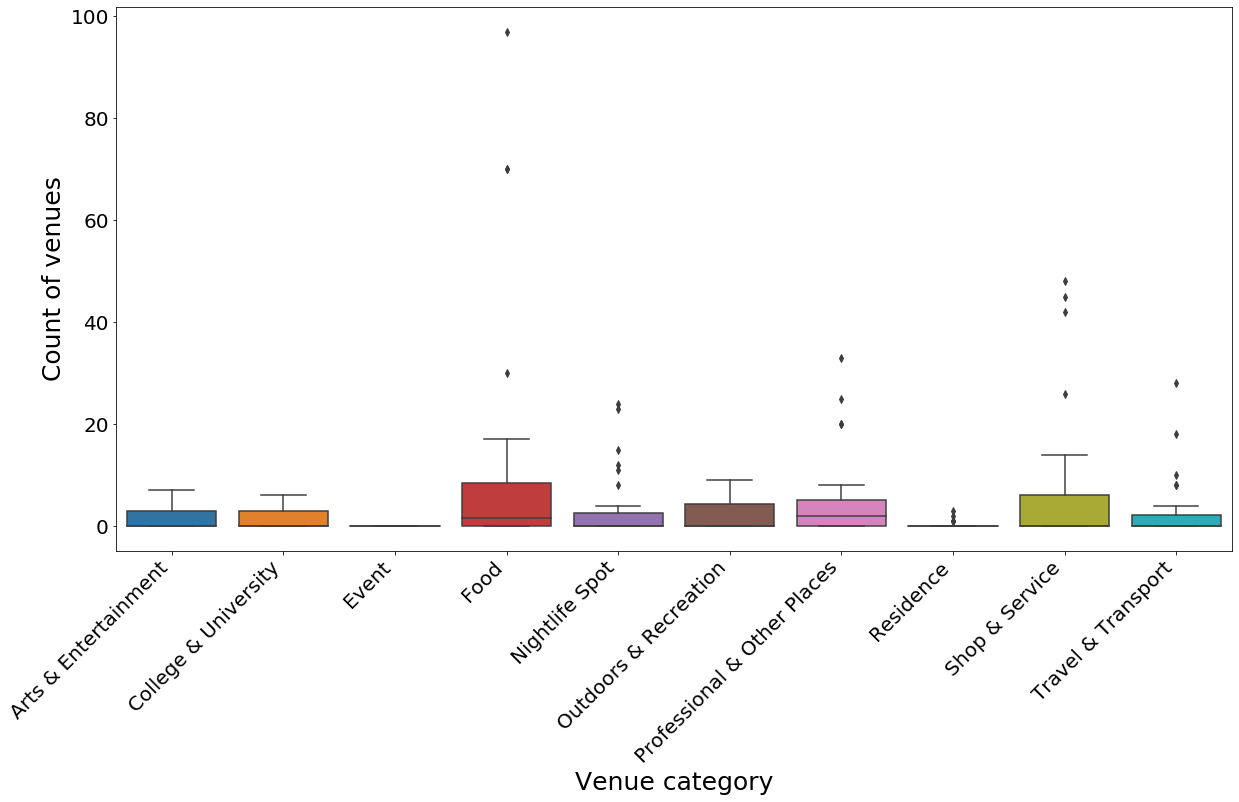

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = stations_venues_df[[c[0] for c in categories_list]])
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

It looks like the most frequent venue categories are Shop&Service, Professional&OtherPlaces, Travel&Transport, and Food. Event has very little data, so let's discard it from both the dataframe and the list of categories.

In [15]:
stations_venues_df.drop('Event', 1, inplace=True)

In [16]:
categories_list = list(filter(lambda x: x[0] != 'Event', categories_list))

Let's normalize the data using MinMaxScaler (scale from 0 to 1). This scales the data and provides an easy to interpret score at the same time and separate the columns to be normalized from the rest of the data :

In [17]:
venues_df = stations_venues_df[[c[0] for c in categories_list]]
venues_df.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0,0,1,0,1,1,0,0,1
1,0,0,2,1,1,5,0,2,1
2,0,0,6,2,0,3,0,4,0
3,0,0,4,1,0,3,0,3,1
4,0,1,3,0,0,4,0,3,2


Now normalize each column in the dataframe venues_df :

In [18]:
from sklearn.preprocessing import MinMaxScaler

X = venues_df
cluster_dataset = MinMaxScaler().fit_transform(X)

Place the results into a dataframe, cluster_df, and take a quick peek the results :

In [19]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.0,0.000000,0.010309,0.000000,0.111111,0.030303,0.0,0.000000,0.035714
1,0.0,0.000000,0.020619,0.041667,0.111111,0.151515,0.0,0.041667,0.035714
2,0.0,0.000000,0.061856,0.083333,0.000000,0.090909,0.0,0.083333,0.000000
3,0.0,0.000000,0.041237,0.041667,0.000000,0.090909,0.0,0.062500,0.035714
4,0.0,0.166667,0.030928,0.000000,0.000000,0.121212,0.0,0.062500,0.071429


Visualize the scaled data :

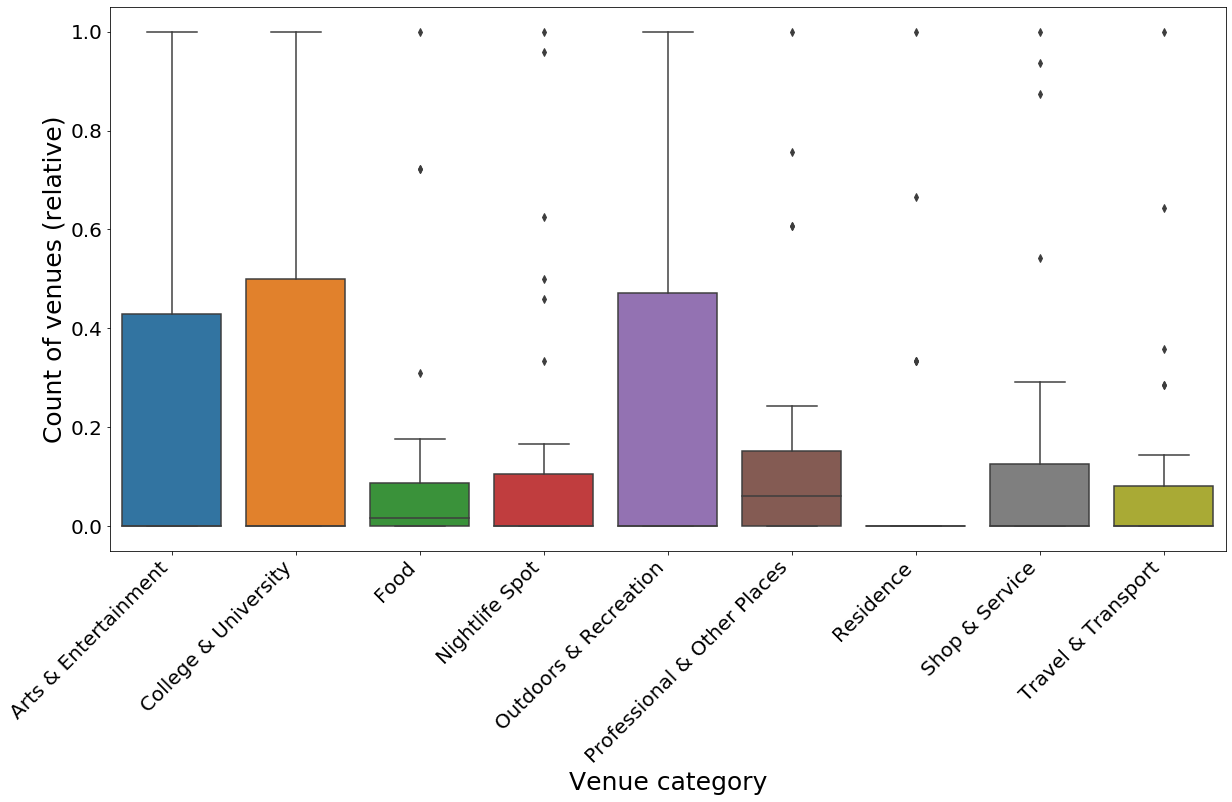

In [20]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [21]:
cluster_df.to_csv('SH_normalized_metro_venues.csv', index=False)

Our classifier will use K-Means Clustering. Using different numbers of clusters, the initial results can be seen below :
    2 clusters divided the area into just the downtown central area and the outer city surrounding area
    3 clusters yield the most intuitive result consisting of high density areas, medium venue density areas, and low density suburbs
    4 or more clusters are difficult to interpret, or need a more in-depth analysis to explain the cluster results
For the scope of this class project, we will use 3 clusters in our analysis.

In [22]:
from sklearn.cluster import KMeans
kclusters = 3

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
replace_labels = {0:2, 1:1, 2:0}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

stations_clusters_df = stations_venues_df.copy()
stations_clusters_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df = cluster_df.copy()
stations_clusters_minmax_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df['Station_Name'] = stations_venues_df['Station_Name']

Use boxplots to view the classified clusters :

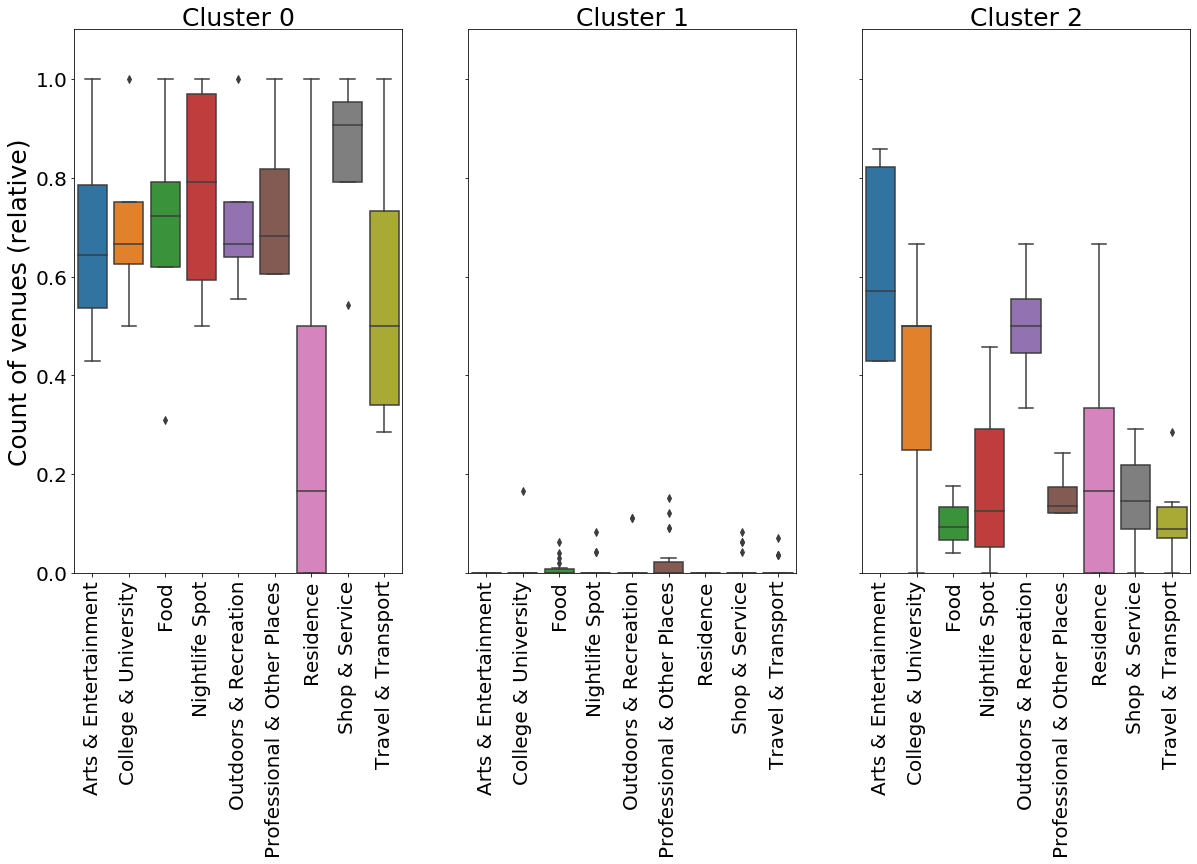

In [23]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1, kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)

for k in range(kclusters):
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

Draw the clustered locations onto a map of Shanghai. We will use 3 colors for the 3 classified clusters. The clickable popup for each station will show the top 3 venue categories surrounding that area.

In [24]:
import folium
stations_clusters_minmax_df['Latitude'] = stations_venues_df['Latitude']
stations_clusters_minmax_df['Longitude'] = stations_venues_df['Longitude']

map_SH = folium.Map(location=[121.392186,31.116872 ], zoom_start=11)

for i, station, lat, lng, cluster in zip(stations_clusters_minmax_df.index,
                                         stations_clusters_minmax_df['Station_Name'],
                                         stations_clusters_minmax_df['Latitude'],
                                         stations_clusters_minmax_df['Longitude'],
                                         stations_clusters_minmax_df['Cluster']):
    latlong = [lat, lng]    
    colors=['red','blue','white']
    station_series = stations_clusters_minmax_df.iloc[i]
    top_categories_dict = {}
    for cat in categories_list:
        top_categories_dict[cat[0]] = station_series[cat[0]]
    top_categories = sorted(top_categories_dict.items(), key = lambda x: x[1], reverse=True)
    popup='<b>{}</b><br>Cluster {}<br>1. {} {}<br>2. {} {}<br>3. {} {}'.format(
        station,
        cluster,
        top_categories[0][0],
        "{0:.2f}".format(top_categories[0][1]),
        top_categories[1][0],
        "{0:.2f}".format(top_categories[1][1]),
        top_categories[2][0],
        "{0:.2f}".format(top_categories[2][1]))
    folium.CircleMarker(
        latlong,
        fill=True,
        fill_opacity=0.5,
        popup=folium.Popup(popup, max_width = 300),
        radius=7,
        color=colors[cluster]
    ).add_to(map_SH)
    
map_SH

In [25]:
map_SH.save('SH_map.html')

Results：

We can briefly summarize each of our classified clusters by looking at the boxplot showing the normalized values for the venues nearby each group of stations :
    Cluster 0 has the highest number of venues nearby, especially for Shop&Service, Nightlife Spot, and Travel&Transport
    Cluster 1 on average has the least number of venues near its stations, and appears as the lowest density area
    Cluster 2 has the lowest number of Residence venues, and is between the other 2 clusters in nearby venue density

After coloring and plotting most of the stations on a map of the Shanghailine1 Metropolitan Region, we can see that :
    Cluster 0 most likely has the highest number of people passing by and creating venues and check-ins, as they are in the densely populated areas of the city (offices and department stores i.e. Xujiahui)
    Cluster 1 marks stations that are not in areas as developed as in the other two clusters
    Cluster 2 seems to mark stations where there are populated by different universities and colleges
The final map is still quite informative as stations nearby were rendered and appear to be correctly classified, so for our project's scope (looking at the area as a whole) this is still deemed quite satisfactory.

Discussion
There are some factors to consider when analyzing the results of this data science project. First, using the Foursquare database to get the number of venues around each station can make our results a bit biased towards the Food and Travel&Transport categories, as these 2 types of locations are the most commented and checked-into places (see the paper at https://www.researchgate.net/publication/261060627_Exploring_venue_popularity_in_Foursquare for more details). The significance of a location or building also is not shown, so some key landmarks or important areas might not be highlighted. However, with the main theme being density and having users being able to click and reveal the top 3 categories of each rendered location on the map, we were able to answer the questions and challenges asked in the beginning of the project. Users can use the interactive map of Shanghai's Metro to find out more about the surroundings of each station by clicking on a circled area, and a popup will inform them about the top 3 types of venues around the station. By familiarizing themselves with the color scheme of the map (blue for high-density, white for medium-density, red for sparsely-dense areas), users can view the overall status of the Shanghai Metropolitan Region.

Conclusion
We have shown how to use the Baidu API, the Foursquare Places API, and the Python Folium library to retrieve the locations and nearby number of venues around each of Shanghai's line1 metro stations, and plot most of them onto an interactive map of the Shanghai Metropolitan Region. The data collected can be useful to others in the future in other areas of research, especially if combined with more data from other sources, such as social media feeds or census data.